In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#os.chdir('C:\\Users\Matthew...')
path = os.getcwd()

df = pd.read_csv("iris.csv")

In [11]:
#The example is unsupervised (no species given)
df = df.drop("species", axis = 1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [17]:
#can use the entire data frame
scaled_df = scaler.fit_transform(df)

In [18]:
from sklearn.cluster import KMeans

In [20]:
ssd = []
for k in range (2, 10):
    model = KMeans(n_clusters = k)
    model.fit(scaled_df)
    #sum of squared distances of samples to their closest cluster center
    ssd.append(model.inertia_)

Text(0, 0.5, 'Sum of squared distances')

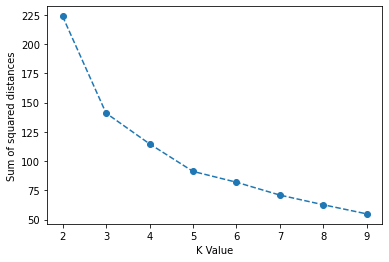

In [21]:
plt.plot(range(2,10), ssd, "o--")
plt.xlabel("K Value")
plt.ylabel("Sum of squared distances")

In [22]:
#From the previous, we see that we want K = 3

In [23]:
model = KMeans(n_clusters = 3)

In [24]:
cluster_labels = model.fit_predict(scaled_df)

In [25]:
df["clusters"] = cluster_labels

In [26]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,clusters
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
path = path + "\\"
df.to_csv(path + "iris_new.csv", index = False, sep = ",", header = "true")